In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

def load_images(path: str, file_ending: str=".png") -> (list, int, int):
    """
    Load all images in path with matplotlib that have given file_ending

    Arguments:
    path: path of directory containing image files that can be assumed to have all the same dimensions
    file_ending: string that image files have to end with, if not->ignore file

    Return:
    images: list of images (each image as numpy.ndarray and dtype=float64)
    dimension_x: size of images in x direction
    dimension_y: size of images in y direction
    """

    images = []

    # TODO read each image in path as numpy.ndarray and append to images
    # Useful functions: lib.list_directory(), matplotlib.image.imread(), numpy.asarray()

    files = os.listdir(path)
    files.sort()
    for cur in files:
        if not cur.endswith(file_ending):
            continue

        try:
            image = mpl.image.imread(path + cur)
            img_mtx = np.asarray(image, dtype="float64")
            images.append(img_mtx)
        except:
            continue

    dimension_y = images[0].shape[0]
    dimension_x = images[0].shape[1]

    return images, dimension_x, dimension_y



class Autoencoder(nn.Module):
    def __init__(self,x,y,encodefeatures):
        super(Autoencoder, self).__init__()
        # TODO YOUR CODE HERE
        self.encode = nn.Linear(x*y, encodefeatures)
        self.decode = nn.Linear(encodefeatures, x*y)
        self.relu   = nn.ReLU()
        
    def forward(self, x):
        # TODO YOUR CODE HERE
        x = self.relu(self.encode(x))
        x = self.decode(x)
        #x = F.softmax(self.decode(x),dim=1)
        return x



if __name__ == '__main__':

    images, x, y = load_images('./data/train/')

    # setup data matrix
    D = np.zeros((len(images), images[0].size), dtype=np.float32)
    for i in range(len(images)):
        D[i, :] = images[i].flatten()

    # 1. calculate and subtract mean to center the data in D
    # TODO YOUR CODE HERE
    mean_data = np.mean(D,axis=0)
    D -= mean_data
    #print(np.mean(D,axis=0).sum())
    
    num_epochs = 2000
    #num_epochs = 100
    #batch_size = 50
    learning_rate = 0.01
    k = 150

    data = torch.from_numpy(D)

    model = Autoencoder(x,y,k)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(
        model.parameters(), lr=learning_rate, weight_decay=1e-05)

    for epoch in range(num_epochs):
        data = Variable(data)
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        MSE_loss = nn.MSELoss()(output, data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # ===================log========================
        print('epoch [{}/{}], loss:{:.5f}, MSE_loss:{:.5f}'
              .format(epoch + 1, num_epochs, loss.data, MSE_loss.data))

    # now we use the nn model to reconstruct test images
    # and measure their reconstruction error

    images_test, x, y = load_images('./data/test/')
    D_test = np.zeros((len(images_test), images_test[0].size), dtype=np.float32)
    for i in range(len(images_test)):
        D_test[i, :] = images_test[i].flatten()

    for i in range(D_test.shape[0]):
        D_test[i, :] -= mean_data

    # or with broadcating
    #D_test -= mean_data
    
    data_test = torch.from_numpy(D_test)

    errors = []
    for i, test_image in enumerate(images_test):

        # evaluate the model using data_test samples i
        #pred = ...
        # add the mean to the predicted/reconstructed image
        # and reshape to size (116,98)
        # TODO YOUR CODE HERE
        
        pred = model.forward(data_test[i])
        pred_np = pred.data.numpy()
        pred_np += mean_data
        img_reconst = pred_np.reshape((116, 98))
        #pass
        # uncomment
        error = np.linalg.norm(images_test[i] - img_reconst)
        errors.append(error)
        print("reconstruction error: ", error)

    


epoch [1/2000], loss:0.07224, MSE_loss:0.07224
epoch [2/2000], loss:8.46346, MSE_loss:8.46346
epoch [3/2000], loss:0.94247, MSE_loss:0.94247
epoch [4/2000], loss:2.58639, MSE_loss:2.58639
epoch [5/2000], loss:4.32347, MSE_loss:4.32347
epoch [6/2000], loss:2.16175, MSE_loss:2.16175
epoch [7/2000], loss:1.03755, MSE_loss:1.03755
epoch [8/2000], loss:0.95819, MSE_loss:0.95819
epoch [9/2000], loss:1.09485, MSE_loss:1.09485
epoch [10/2000], loss:1.07900, MSE_loss:1.07900
epoch [11/2000], loss:0.95099, MSE_loss:0.95099
epoch [12/2000], loss:0.81437, MSE_loss:0.81437
epoch [13/2000], loss:0.69529, MSE_loss:0.69529
epoch [14/2000], loss:0.60593, MSE_loss:0.60593
epoch [15/2000], loss:0.52592, MSE_loss:0.52592
epoch [16/2000], loss:0.46689, MSE_loss:0.46689
epoch [17/2000], loss:0.41695, MSE_loss:0.41695
epoch [18/2000], loss:0.37308, MSE_loss:0.37308
epoch [19/2000], loss:0.32722, MSE_loss:0.32722
epoch [20/2000], loss:0.28972, MSE_loss:0.28972
epoch [21/2000], loss:0.26147, MSE_loss:0.26147
e

epoch [172/2000], loss:0.01629, MSE_loss:0.01629
epoch [173/2000], loss:0.01626, MSE_loss:0.01626
epoch [174/2000], loss:0.01619, MSE_loss:0.01619
epoch [175/2000], loss:0.01608, MSE_loss:0.01608
epoch [176/2000], loss:0.01595, MSE_loss:0.01595
epoch [177/2000], loss:0.01585, MSE_loss:0.01585
epoch [178/2000], loss:0.01578, MSE_loss:0.01578
epoch [179/2000], loss:0.01573, MSE_loss:0.01573
epoch [180/2000], loss:0.01567, MSE_loss:0.01567
epoch [181/2000], loss:0.01557, MSE_loss:0.01557
epoch [182/2000], loss:0.01546, MSE_loss:0.01546
epoch [183/2000], loss:0.01537, MSE_loss:0.01537
epoch [184/2000], loss:0.01531, MSE_loss:0.01531
epoch [185/2000], loss:0.01525, MSE_loss:0.01525
epoch [186/2000], loss:0.01518, MSE_loss:0.01518
epoch [187/2000], loss:0.01510, MSE_loss:0.01510
epoch [188/2000], loss:0.01501, MSE_loss:0.01501
epoch [189/2000], loss:0.01493, MSE_loss:0.01493
epoch [190/2000], loss:0.01486, MSE_loss:0.01486
epoch [191/2000], loss:0.01480, MSE_loss:0.01480
epoch [192/2000], lo

epoch [340/2000], loss:0.00822, MSE_loss:0.00822
epoch [341/2000], loss:0.00819, MSE_loss:0.00819
epoch [342/2000], loss:0.00816, MSE_loss:0.00816
epoch [343/2000], loss:0.00813, MSE_loss:0.00813
epoch [344/2000], loss:0.00811, MSE_loss:0.00811
epoch [345/2000], loss:0.00808, MSE_loss:0.00808
epoch [346/2000], loss:0.00805, MSE_loss:0.00805
epoch [347/2000], loss:0.00802, MSE_loss:0.00802
epoch [348/2000], loss:0.00799, MSE_loss:0.00799
epoch [349/2000], loss:0.00797, MSE_loss:0.00797
epoch [350/2000], loss:0.00794, MSE_loss:0.00794
epoch [351/2000], loss:0.00791, MSE_loss:0.00791
epoch [352/2000], loss:0.00789, MSE_loss:0.00789
epoch [353/2000], loss:0.00786, MSE_loss:0.00786
epoch [354/2000], loss:0.00783, MSE_loss:0.00783
epoch [355/2000], loss:0.00781, MSE_loss:0.00781
epoch [356/2000], loss:0.00778, MSE_loss:0.00778
epoch [357/2000], loss:0.00775, MSE_loss:0.00775
epoch [358/2000], loss:0.00773, MSE_loss:0.00773
epoch [359/2000], loss:0.00770, MSE_loss:0.00770
epoch [360/2000], lo

epoch [508/2000], loss:0.00464, MSE_loss:0.00464
epoch [509/2000], loss:0.00463, MSE_loss:0.00463
epoch [510/2000], loss:0.00461, MSE_loss:0.00461
epoch [511/2000], loss:0.00460, MSE_loss:0.00460
epoch [512/2000], loss:0.00458, MSE_loss:0.00458
epoch [513/2000], loss:0.00456, MSE_loss:0.00456
epoch [514/2000], loss:0.00455, MSE_loss:0.00455
epoch [515/2000], loss:0.00453, MSE_loss:0.00453
epoch [516/2000], loss:0.00452, MSE_loss:0.00452
epoch [517/2000], loss:0.00450, MSE_loss:0.00450
epoch [518/2000], loss:0.00449, MSE_loss:0.00449
epoch [519/2000], loss:0.00447, MSE_loss:0.00447
epoch [520/2000], loss:0.00446, MSE_loss:0.00446
epoch [521/2000], loss:0.00444, MSE_loss:0.00444
epoch [522/2000], loss:0.00442, MSE_loss:0.00442
epoch [523/2000], loss:0.00441, MSE_loss:0.00441
epoch [524/2000], loss:0.00439, MSE_loss:0.00439
epoch [525/2000], loss:0.00438, MSE_loss:0.00438
epoch [526/2000], loss:0.00436, MSE_loss:0.00436
epoch [527/2000], loss:0.00435, MSE_loss:0.00435
epoch [528/2000], lo

epoch [677/2000], loss:0.00261, MSE_loss:0.00261
epoch [678/2000], loss:0.00261, MSE_loss:0.00261
epoch [679/2000], loss:0.00260, MSE_loss:0.00260
epoch [680/2000], loss:0.00259, MSE_loss:0.00259
epoch [681/2000], loss:0.00258, MSE_loss:0.00258
epoch [682/2000], loss:0.00257, MSE_loss:0.00257
epoch [683/2000], loss:0.00256, MSE_loss:0.00256
epoch [684/2000], loss:0.00255, MSE_loss:0.00255
epoch [685/2000], loss:0.00255, MSE_loss:0.00255
epoch [686/2000], loss:0.00254, MSE_loss:0.00254
epoch [687/2000], loss:0.00253, MSE_loss:0.00253
epoch [688/2000], loss:0.00252, MSE_loss:0.00252
epoch [689/2000], loss:0.00251, MSE_loss:0.00251
epoch [690/2000], loss:0.00250, MSE_loss:0.00250
epoch [691/2000], loss:0.00250, MSE_loss:0.00250
epoch [692/2000], loss:0.00249, MSE_loss:0.00249
epoch [693/2000], loss:0.00248, MSE_loss:0.00248
epoch [694/2000], loss:0.00247, MSE_loss:0.00247
epoch [695/2000], loss:0.00246, MSE_loss:0.00246
epoch [696/2000], loss:0.00245, MSE_loss:0.00245
epoch [697/2000], lo

epoch [845/2000], loss:0.00151, MSE_loss:0.00151
epoch [846/2000], loss:0.00150, MSE_loss:0.00150
epoch [847/2000], loss:0.00150, MSE_loss:0.00150
epoch [848/2000], loss:0.00149, MSE_loss:0.00149
epoch [849/2000], loss:0.00149, MSE_loss:0.00149
epoch [850/2000], loss:0.00148, MSE_loss:0.00148
epoch [851/2000], loss:0.00148, MSE_loss:0.00148
epoch [852/2000], loss:0.00147, MSE_loss:0.00147
epoch [853/2000], loss:0.00147, MSE_loss:0.00147
epoch [854/2000], loss:0.00146, MSE_loss:0.00146
epoch [855/2000], loss:0.00146, MSE_loss:0.00146
epoch [856/2000], loss:0.00146, MSE_loss:0.00146
epoch [857/2000], loss:0.00145, MSE_loss:0.00145
epoch [858/2000], loss:0.00145, MSE_loss:0.00145
epoch [859/2000], loss:0.00144, MSE_loss:0.00144
epoch [860/2000], loss:0.00144, MSE_loss:0.00144
epoch [861/2000], loss:0.00143, MSE_loss:0.00143
epoch [862/2000], loss:0.00143, MSE_loss:0.00143
epoch [863/2000], loss:0.00142, MSE_loss:0.00142
epoch [864/2000], loss:0.00142, MSE_loss:0.00142
epoch [865/2000], lo

epoch [1013/2000], loss:0.00091, MSE_loss:0.00091
epoch [1014/2000], loss:0.00091, MSE_loss:0.00091
epoch [1015/2000], loss:0.00090, MSE_loss:0.00090
epoch [1016/2000], loss:0.00089, MSE_loss:0.00089
epoch [1017/2000], loss:0.00089, MSE_loss:0.00089
epoch [1018/2000], loss:0.00089, MSE_loss:0.00089
epoch [1019/2000], loss:0.00089, MSE_loss:0.00089
epoch [1020/2000], loss:0.00088, MSE_loss:0.00088
epoch [1021/2000], loss:0.00088, MSE_loss:0.00088
epoch [1022/2000], loss:0.00088, MSE_loss:0.00088
epoch [1023/2000], loss:0.00088, MSE_loss:0.00088
epoch [1024/2000], loss:0.00088, MSE_loss:0.00088
epoch [1025/2000], loss:0.00087, MSE_loss:0.00087
epoch [1026/2000], loss:0.00087, MSE_loss:0.00087
epoch [1027/2000], loss:0.00086, MSE_loss:0.00086
epoch [1028/2000], loss:0.00086, MSE_loss:0.00086
epoch [1029/2000], loss:0.00086, MSE_loss:0.00086
epoch [1030/2000], loss:0.00086, MSE_loss:0.00086
epoch [1031/2000], loss:0.00086, MSE_loss:0.00086
epoch [1032/2000], loss:0.00085, MSE_loss:0.00085


epoch [1178/2000], loss:0.00057, MSE_loss:0.00057
epoch [1179/2000], loss:0.00057, MSE_loss:0.00057
epoch [1180/2000], loss:0.00056, MSE_loss:0.00056
epoch [1181/2000], loss:0.00056, MSE_loss:0.00056
epoch [1182/2000], loss:0.00056, MSE_loss:0.00056
epoch [1183/2000], loss:0.00057, MSE_loss:0.00057
epoch [1184/2000], loss:0.00057, MSE_loss:0.00057
epoch [1185/2000], loss:0.00056, MSE_loss:0.00056
epoch [1186/2000], loss:0.00056, MSE_loss:0.00056
epoch [1187/2000], loss:0.00056, MSE_loss:0.00056
epoch [1188/2000], loss:0.00055, MSE_loss:0.00055
epoch [1189/2000], loss:0.00055, MSE_loss:0.00055
epoch [1190/2000], loss:0.00055, MSE_loss:0.00055
epoch [1191/2000], loss:0.00054, MSE_loss:0.00054
epoch [1192/2000], loss:0.00054, MSE_loss:0.00054
epoch [1193/2000], loss:0.00054, MSE_loss:0.00054
epoch [1194/2000], loss:0.00054, MSE_loss:0.00054
epoch [1195/2000], loss:0.00054, MSE_loss:0.00054
epoch [1196/2000], loss:0.00054, MSE_loss:0.00054
epoch [1197/2000], loss:0.00053, MSE_loss:0.00053


epoch [1342/2000], loss:0.00044, MSE_loss:0.00044
epoch [1343/2000], loss:0.00043, MSE_loss:0.00043
epoch [1344/2000], loss:0.00042, MSE_loss:0.00042
epoch [1345/2000], loss:0.00040, MSE_loss:0.00040
epoch [1346/2000], loss:0.00039, MSE_loss:0.00039
epoch [1347/2000], loss:0.00038, MSE_loss:0.00038
epoch [1348/2000], loss:0.00037, MSE_loss:0.00037
epoch [1349/2000], loss:0.00037, MSE_loss:0.00037
epoch [1350/2000], loss:0.00036, MSE_loss:0.00036
epoch [1351/2000], loss:0.00036, MSE_loss:0.00036
epoch [1352/2000], loss:0.00035, MSE_loss:0.00035
epoch [1353/2000], loss:0.00034, MSE_loss:0.00034
epoch [1354/2000], loss:0.00034, MSE_loss:0.00034
epoch [1355/2000], loss:0.00033, MSE_loss:0.00033
epoch [1356/2000], loss:0.00033, MSE_loss:0.00033
epoch [1357/2000], loss:0.00033, MSE_loss:0.00033
epoch [1358/2000], loss:0.00032, MSE_loss:0.00032
epoch [1359/2000], loss:0.00032, MSE_loss:0.00032
epoch [1360/2000], loss:0.00032, MSE_loss:0.00032
epoch [1361/2000], loss:0.00032, MSE_loss:0.00032


epoch [1506/2000], loss:0.00030, MSE_loss:0.00030
epoch [1507/2000], loss:0.00028, MSE_loss:0.00028
epoch [1508/2000], loss:0.00026, MSE_loss:0.00026
epoch [1509/2000], loss:0.00026, MSE_loss:0.00026
epoch [1510/2000], loss:0.00026, MSE_loss:0.00026
epoch [1511/2000], loss:0.00025, MSE_loss:0.00025
epoch [1512/2000], loss:0.00025, MSE_loss:0.00025
epoch [1513/2000], loss:0.00024, MSE_loss:0.00024
epoch [1514/2000], loss:0.00023, MSE_loss:0.00023
epoch [1515/2000], loss:0.00023, MSE_loss:0.00023
epoch [1516/2000], loss:0.00022, MSE_loss:0.00022
epoch [1517/2000], loss:0.00022, MSE_loss:0.00022
epoch [1518/2000], loss:0.00022, MSE_loss:0.00022
epoch [1519/2000], loss:0.00021, MSE_loss:0.00021
epoch [1520/2000], loss:0.00021, MSE_loss:0.00021
epoch [1521/2000], loss:0.00021, MSE_loss:0.00021
epoch [1522/2000], loss:0.00021, MSE_loss:0.00021
epoch [1523/2000], loss:0.00021, MSE_loss:0.00021
epoch [1524/2000], loss:0.00020, MSE_loss:0.00020
epoch [1525/2000], loss:0.00020, MSE_loss:0.00020


epoch [1671/2000], loss:0.00056, MSE_loss:0.00056
epoch [1672/2000], loss:0.00051, MSE_loss:0.00051
epoch [1673/2000], loss:0.00044, MSE_loss:0.00044
epoch [1674/2000], loss:0.00037, MSE_loss:0.00037
epoch [1675/2000], loss:0.00032, MSE_loss:0.00032
epoch [1676/2000], loss:0.00030, MSE_loss:0.00030
epoch [1677/2000], loss:0.00028, MSE_loss:0.00028
epoch [1678/2000], loss:0.00026, MSE_loss:0.00026
epoch [1679/2000], loss:0.00025, MSE_loss:0.00025
epoch [1680/2000], loss:0.00025, MSE_loss:0.00025
epoch [1681/2000], loss:0.00024, MSE_loss:0.00024
epoch [1682/2000], loss:0.00022, MSE_loss:0.00022
epoch [1683/2000], loss:0.00021, MSE_loss:0.00021
epoch [1684/2000], loss:0.00021, MSE_loss:0.00021
epoch [1685/2000], loss:0.00020, MSE_loss:0.00020
epoch [1686/2000], loss:0.00019, MSE_loss:0.00019
epoch [1687/2000], loss:0.00019, MSE_loss:0.00019
epoch [1688/2000], loss:0.00018, MSE_loss:0.00018
epoch [1689/2000], loss:0.00018, MSE_loss:0.00018
epoch [1690/2000], loss:0.00017, MSE_loss:0.00017


epoch [1835/2000], loss:0.00011, MSE_loss:0.00011
epoch [1836/2000], loss:0.00011, MSE_loss:0.00011
epoch [1837/2000], loss:0.00011, MSE_loss:0.00011
epoch [1838/2000], loss:0.00011, MSE_loss:0.00011
epoch [1839/2000], loss:0.00011, MSE_loss:0.00011
epoch [1840/2000], loss:0.00011, MSE_loss:0.00011
epoch [1841/2000], loss:0.00011, MSE_loss:0.00011
epoch [1842/2000], loss:0.00011, MSE_loss:0.00011
epoch [1843/2000], loss:0.00011, MSE_loss:0.00011
epoch [1844/2000], loss:0.00011, MSE_loss:0.00011
epoch [1845/2000], loss:0.00011, MSE_loss:0.00011
epoch [1846/2000], loss:0.00011, MSE_loss:0.00011
epoch [1847/2000], loss:0.00012, MSE_loss:0.00012
epoch [1848/2000], loss:0.00012, MSE_loss:0.00012
epoch [1849/2000], loss:0.00013, MSE_loss:0.00013
epoch [1850/2000], loss:0.00014, MSE_loss:0.00014
epoch [1851/2000], loss:0.00016, MSE_loss:0.00016
epoch [1852/2000], loss:0.00019, MSE_loss:0.00019
epoch [1853/2000], loss:0.00023, MSE_loss:0.00023
epoch [1854/2000], loss:0.00030, MSE_loss:0.00030


epoch [2000/2000], loss:0.00195, MSE_loss:0.00195
reconstruction error:  5.565560207694015
reconstruction error:  17.019225326219043
reconstruction error:  13.364575783126389
reconstruction error:  14.191255594864815
reconstruction error:  17.390283643708102
reconstruction error:  15.638103358374984
reconstruction error:  11.855017692041113
reconstruction error:  10.103852641774461
reconstruction error:  7.246808324594935
reconstruction error:  13.473712244867668
reconstruction error:  12.79957212770805
reconstruction error:  12.469004740172672
reconstruction error:  13.922764935205453
reconstruction error:  11.996907816905733
reconstruction error:  13.015039671801551


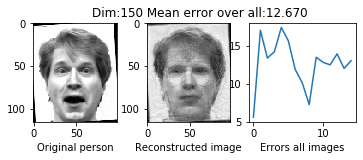

Mean error 12.670112273937267


In [6]:
formatErr = "{:.3f}".format(np.asarray(errors).mean())    
    
grid = plt.GridSpec(2, 9)

plt.subplot(grid[0, 0:3])
plt.title('Dim:'+str(k)+' Mean error over all:'+formatErr,x=2)
plt.imshow(images_test[14], cmap='Greys_r')
plt.xlabel('Original person')

pred = model(data_test[14, :])
pred_np = pred.data.numpy()
pred_np += mean_data
img_reconst = pred_np.reshape((116, 98))
plt.subplot(grid[0, 3:6])
plt.imshow(img_reconst, cmap='Greys_r')
plt.xlabel('Reconstructed image')

plt.subplot(grid[0, 6:])
plt.plot(np.arange(len(images_test)), errors)
plt.xlabel('Errors all images')

plt.savefig("pca_ae_solution.png")
plt.show()

print("Mean error", np.asarray(errors).mean())